In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import partial

A politician visiting a chain of islands to canvas support, the politician uses a simple rule to determine which island to visit next. Each day, the politician chooses a neighboring island and compares the populations there with the population of the current island. If the neighboring island has a larger population, the politician goes over. If the neighboring island has a smaller population, then the politician visits with probability 

$$
p=\frac{p_{\rm neighbor}}{p_{\rm current}}
$$

otherwise the politician stays on the same island.

In [2]:
def make_islands(n, low=10, high=101):
    islands = np.random.randint(low, high, n+2)
    islands[0] = 0
    islands[-1] = 0
    return islands

In [3]:
def hop(islands, start=1, niter=1000):
    pos = start
    pop = islands[pos]
    thetas = np.zeros(niter+1, dtype='int')
    thetas[0] = pos
    for i in range(niter):
        # generate sample from proposal distribution
        k = np.random.choice([-1, 1], 1)
        next_pos = pos + k
        # evaluate unnormalized target distribution at proposed position
        next_pop = islands[next_pos]
        # calculate acceptance probability
        p = min(1, next_pop/pop)
        # use uniform random to decide accept/reject proposal
        if np.random.random() < p:
            pos = next_pos
            pop = next_pop
        thetas[i+1] = pos
    return thetas

In [4]:
islands = make_islands(10)
thetas = hop(islands, start=1, niter=10000)

## True population proportions

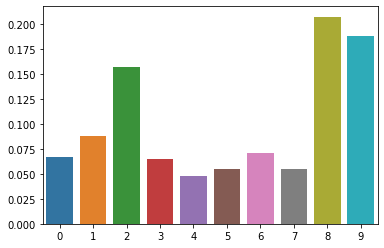

In [5]:
data = islands[1:-1]
data = data/data.sum()
sns.barplot(x=np.arange(len(data)), y=data);

## Estimated population proportions

After doing this for many days, the politician will end up spending time on each island proportional to the population of each island - in other words, estimating the distribution of island populations correctly.

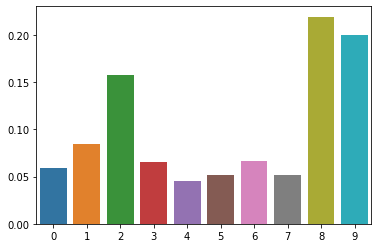

In [6]:
data = np.bincount(thetas)[1:]
data = data/data.sum()
sns.barplot(x=np.arange(len(data)), y=data);

# Generic Metropolis scheme

In [7]:
def metroplis(start, target, proposal, niter, nburn=0):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current)
        p = min(target(proposed)/target(current), 1)
        if np.random.random() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

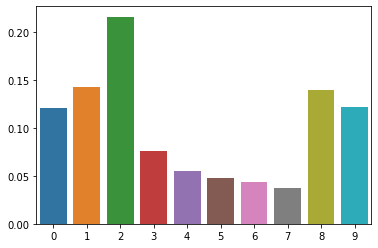

In [10]:
target = lambda x: islands[x]
proposal = lambda x: x + np.random.choice([-1, 1])
post = metroplis(1, target, proposal, 2000)
data = np.bincount(post)[1:]
data = data/data.sum()
sns.barplot(x=np.arange(len(data)), y=data);